In [1]:
# import lib
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, initializers
import matplotlib.pyplot as plt

In [2]:
# load dataset and preprocess
(f_x_train, f_y_train), (f_x_test, f_y_test) = keras.datasets.fashion_mnist.load_data()
f_x_train = f_x_train.reshape(-1, 784).astype("float32") / 255.0
f_x_test = f_x_test.reshape(-1, 784).astype("float32") / 255.0

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
# function to create a model with specified initializer
def create_fashion_model(init_strategy):
    return keras.Sequential([
        layers.Input(shape=(784,)),
        layers.Dense(300, activation='relu', kernel_initializer=init_strategy),
        layers.Dense(100, activation='relu', kernel_initializer=init_strategy),
        layers.Dense(10, activation='softmax')
    ])

In [4]:
# train and return history
def train_initializer_variant(label, initializer_obj):
    print(f"🔧 Training with initializer: {label}")
    model = create_fashion_model(initializer_obj)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(f_x_train, f_y_train, validation_split=0.2,
                        epochs=12, batch_size=128, verbose=0)
    return history

In [5]:
# initializers to compare
initializer_options = {
    "HeNormal": initializers.HeNormal(),
    "Xavier (GlorotUniform)": initializers.GlorotUniform(),
    "RandomNormal": initializers.RandomNormal(mean=0., stddev=0.05),
    "Ones (for contrast)": initializers.Ones()
}

In [6]:
# train each variant and collect histories
all_histories = {}
for name, init in initializer_options.items():
    all_histories[name] = train_initializer_variant(name, init)

🔧 Training with initializer: HeNormal
🔧 Training with initializer: Xavier (GlorotUniform)
🔧 Training with initializer: RandomNormal
🔧 Training with initializer: Ones (for contrast)


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


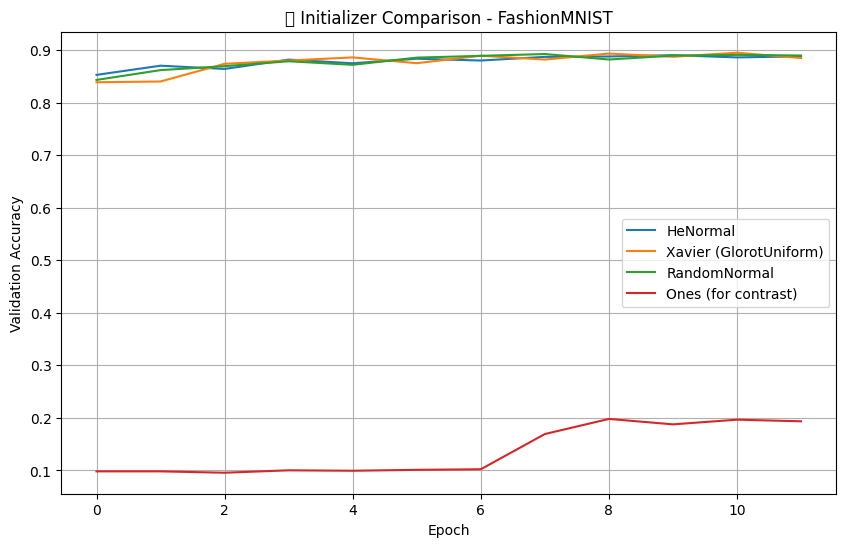

In [7]:
# plot the validation accuracy results
plt.figure(figsize=(10, 6))
for name, history in all_histories.items():
    plt.plot(history.history['val_accuracy'], label=name)
plt.title("📈 Initializer Comparison - FashionMNIST")
plt.xlabel("Epoch")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.grid(True)
plt.show()